# MNIST

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
mnist = tf.keras.datasets.mnist

In [13]:
with tf.device('/GPU:0'):
    (train_x, train_y), (test_x, test_y) = mnist.load_data()

    print(type(train_x), type(train_y))
    print(train_x.shape, train_y.shape)
    train_x, test_x = train_x/255.0, test_x/255.0

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)


In [14]:
with tf.device('/GPU:0'):
    train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
    test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [15]:
with tf.device('/GPU:0'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (28, 28, 1)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 128, activation = 'relu'),

    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [16]:
with tf.device('/GPU:0'):
    model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [17]:
with tf.device('/GPU:0'):
    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [18]:
with tf.device('/GPU:0'):
    model.fit(train_x, train_y, batch_size = 50, epochs = 3)

Epoch 1/3
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1432 - accuracy: 0.9568
Epoch 2/3
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 3/3
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0288 - accuracy: 0.9912


In [19]:
test_loss, test_acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9887


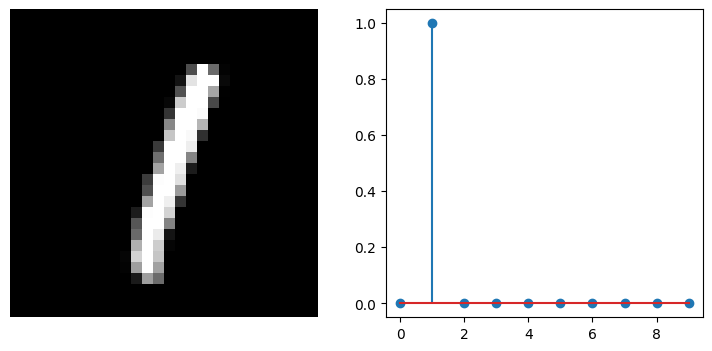

Prediction : 1


In [23]:
test_img = test_x[[5]]

predict = model.predict(test_img, verbose = 0)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (9, 4))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

# Steel Surface Defects

In [32]:
train_x = np.load('./NEU_train_imgs.npy')
train_y = np.load('./NEU_train_labels.npy')
test_x = np.load('./NEU_test_imgs.npy')
test_y = np.load('./NEU_test_labels.npy')

In [33]:
print(train_x.shape)
print(train_y.shape)

(1500, 200, 200, 1)
(1500,)


In [34]:
print(test_x.shape)
print(test_y.shape)

(300, 200, 200, 1)
(300,)


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (200, 200, 1)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (100, 100, 32)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 128,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (50, 50, 64)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 128, activation = 'relu'),

    tf.keras.layers.Dense(units = 6, activation = 'softmax')
])

In [36]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [37]:
model.fit(train_x, train_y, batch_size = 50, epochs = 10)

Epoch 1/10
30/30 [==============================] - 2s 46ms/step - loss: 1.8596 - accuracy: 0.2133
Epoch 2/10
30/30 [==============================] - 1s 44ms/step - loss: 1.2238 - accuracy: 0.5567
Epoch 3/10
30/30 [==============================] - 1s 45ms/step - loss: 0.5997 - accuracy: 0.7840
Epoch 4/10
30/30 [==============================] - 1s 45ms/step - loss: 0.4746 - accuracy: 0.8247
Epoch 5/10
30/30 [==============================] - 1s 45ms/step - loss: 0.2894 - accuracy: 0.8973
Epoch 6/10
30/30 [==============================] - 1s 44ms/step - loss: 0.3020 - accuracy: 0.8767
Epoch 7/10
30/30 [==============================] - 1s 45ms/step - loss: 0.2415 - accuracy: 0.9127
Epoch 8/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1899 - accuracy: 0.9340
Epoch 9/10
30/30 [==============================] - 1s 45ms/step - loss: 0.1793 - accuracy: 0.9333
Epoch 10/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1498 - accuracy: 0.9473


In [38]:
test_loss, test_acc = model.evaluate(test_x, test_y)

10/10 [==============================] - 1s 18ms/step - loss: 0.1725 - accuracy: 0.9500


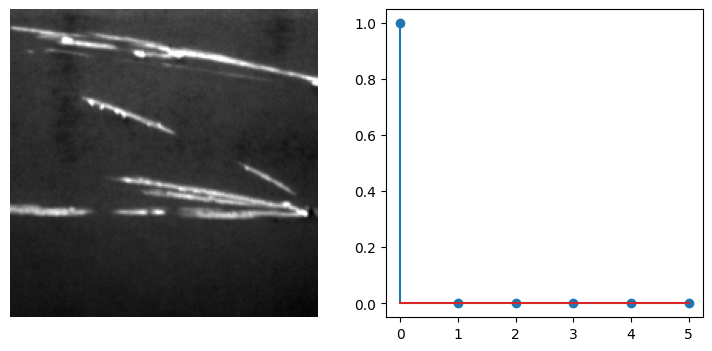

Prediction : scratches
True Label : scratches


In [41]:
name = ['scratches', 'rolled-in scale', 'pitted surface', 'patches', 'inclusion', 'crazing']

idx = np.random.choice(test_x.shape[0], 1)
test_img = test_x[idx]
test_label = test_y[idx]

predict = model.predict(test_img, verbose = 0)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (9, 4))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(200, 200), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(name[mypred[0]]))
print('True Label : {}'.format(name[test_label[0]]))